In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [2]:
#loading the data from csv to pandas
car_dataset = pd.read_csv('/content/car data.csv')


In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#check the missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the distribution of catogorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
#encoding the catogorical data

In [13]:
#encoding the fuel type 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)


In [14]:
#encoding the seller type 
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [11]:
#encoding the Transmission type 
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into target

In [16]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [19]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting data into test and training data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model training

1.    Linear regression






In [25]:
#loading linear regression model
lin_reg_model = LinearRegression()

In [26]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model evaluation

In [28]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [29]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8799451660493711


Visualize the actual price and actual price

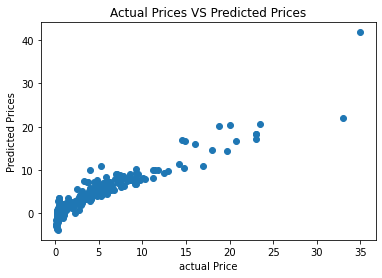

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [32]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [33]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8365766715027051


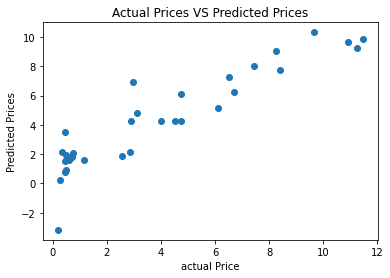

In [34]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

Lasso Regression

In [35]:
#loading lasso regression model
las_reg_model = Lasso()

In [36]:
las_reg_model.fit(X_train,Y_train)

Lasso()

Model evaluation

In [37]:
#prediction on training data
training_data_prediction = las_reg_model.predict(X_train)

In [39]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8427856123435794


Visualize the actual price and actual price

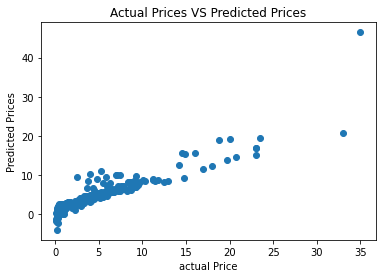

In [40]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [41]:
#prediction on test data
test_data_prediction = las_reg_model.predict(X_test)

In [42]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8709167941173195


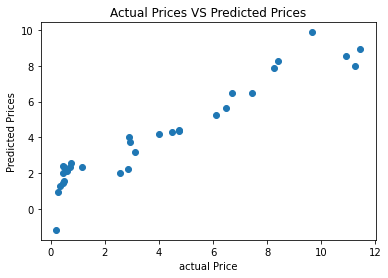

In [43]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [ ]:
def predict_car_price(model, year, present_price, km_driven, fuel_type, seller_type, transmission_type, owner):
    """
    Predicts the selling price of a car based on its year, present price, kilometers driven, fuel type, seller type,
    transmission type, and number of previous owners using a trained linear regression model.
    
    Args:
    model (LinearRegression): Trained linear regression model
    year (int): Year of the car (e.g. 2018)
    present_price (float): Present price of the car (in lakhs)
    km_driven (int): Number of kilometers driven by the car
    fuel_type (str): Fuel type of the car (e.g. 'Petrol', 'Diesel', 'CNG')
    seller_type (str): Seller type of the car (e.g. 'Dealer', 'Individual')
    transmission_type (str): Transmission type of the car (e.g. 'Manual', 'Automatic')
    owner (int): Number of previous owners of the car
    
    Returns:
    float: Predicted selling price of the car
    """
    
    # Encode categorical variables
    fuel_type_dict = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
    seller_type_dict = {'Dealer': 0, 'Individual': 1}
    transmission_type_dict = {'Manual': 0, 'Automatic': 1}
    
    fuel_type_encoded = fuel_type_dict[fuel_type]
    seller_type_encoded = seller_type_dict[seller_type]
    transmission_type_encoded = transmission_type_dict[transmission_type]
    
    # Create a Pandas dataframe with the input features
    input_data = pd.DataFrame({
        'Year': year,
        'Present_Price': present_price,
        'Kms_Driven': km_driven,
        'Fuel_Type': fuel_type_encoded,
        'Seller_Type': seller_type_encoded,
        'Transmission': transmission_type_encoded,
        'Owner': owner
    }, index=[0])
    
    # Use the model to make a prediction
    prediction = model.predict(input_data)[0]
    
    return prediction
